In [1]:
import torch
import torch.nn.parallel
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../")

In [4]:
IMAGE_SIZE = 64
EPOCHS = 500
model = '../output_models/generator{:d}'.format(EPOCHS)

In [5]:
generator = torch.load(model)

## Generate interpolation latent variable

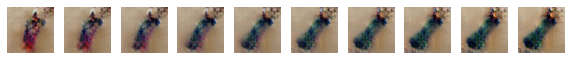

In [21]:
noise_start = torch.randn(1, 100)
noise_end = torch.randn(1, 100)

interpolations = []

interplate_steps = np.linspace(0, 1, 10)
for step in interplate_steps:
    interpolate_noises = noise_start * (1 - step) + noise_end * step
    interpolations.append(interpolate_noises)

fig = plt.figure(figsize=(10, 10))
for index, interpolate_noise in enumerate(interpolations):
    plt.subplot(10, 10, index+1)
    generate_image = generator(interpolate_noise).detach().numpy()
    plt.imshow((generate_image[0].transpose(1, 2, 0) * 127.5 + 127.5).astype(np.uint8))
    plt.axis('off')
plt.show()

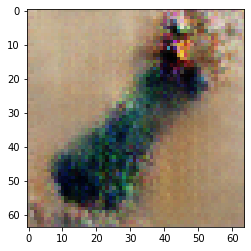

In [22]:
plt.imshow((generate_image[0].transpose(1, 2, 0) * 127.5 + 127.5).astype(np.uint8))